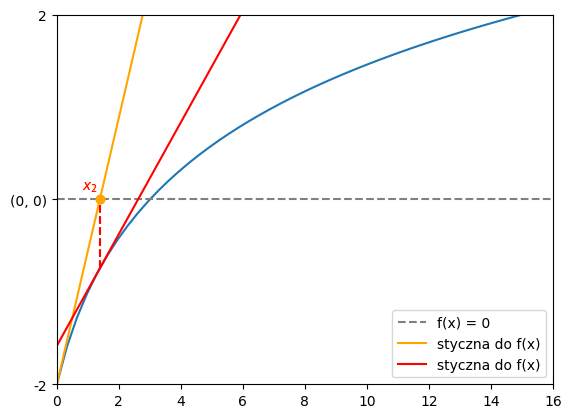

In [50]:
import matplotlib.pyplot as plt
import math
import numpy

x_array = numpy.linspace(0, 16)

x_1 = 2 * math.log(2)
y_1 = math.log2(x_1 + 1) - 2

#   func
plt.plot(x_array, [math.log2(x + 1) - 2 for x in x_array])
plt.plot(x_array, [0 for x in x_array], color = 'grey', ls = '--', label = 'f(x) = 0')

#   styczna 1   --------------------------
plt.plot(x_array, [(x / math.log(2)) - 2 for x in x_array], color = 'orange', label = 'styczna do f(x)')
#plt.axvline(2 * math.log(2), color = 'orange', ls = '--')
plt.plot([x_1, x_1], [y_1, 0], color = 'orange', linestyle = '--')

#   punkt
plt.text(0.8, 0.1, '$x_1$', color = 'orange')
plt.plot(2 * math.log(2), 0, 'o',color = 'orange')

#   styczna 2   --------------------------
x_2 = x_1
plt.plot(x_array, [((x - x_2) / ((math.log(2)) * (x_2 + 1)))  + math.log2(x_2 + 1) - 2 for x in x_array], color = 'red', label = 'styczna do f(x)')
plt.plot([x_1, x_1], [y_1, 0], color = 'red', linestyle = '--')

#   punkt
plt.text(0.8, 0.1, '$x_2$', color = 'red')
plt.plot(2 * math.log(2), 0, 'o',color = 'orange')


plt.legend(loc = 'lower right')
plt.margins(False)
plt.ylim(-2, 2)
plt.xlim(0, 16)

plt.yticks([-2, 0, 2], [-2, (0, 0), 2])

plt.show()

#stworzyc analogiczny (ogolny, funkcje) dla f(X) = x^4 - 13 dla x [-5, 1], 3 kropki od x_0 = -5